<a href="https://colab.research.google.com/github/takeknock/backtrader_samples/blob/master/BackTrader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/yuki-data/backtrader@dev/ito/remove-tkagg-import

  Cloning https://github.com/yuki-data/backtrader (to revision dev/ito/remove-tkagg-import) to /tmp/pip-req-build-twtt2yym
  Running command git clone -q https://github.com/yuki-data/backtrader /tmp/pip-req-build-twtt2yym
  Running command git checkout -b dev/ito/remove-tkagg-import --track origin/dev/ito/remove-tkagg-import
  Switched to a new branch 'dev/ito/remove-tkagg-import'
  Branch 'dev/ito/remove-tkagg-import' set up to track remote branch 'dev/ito/remove-tkagg-import' from 'origin'.
  Created wheel for backtrader: filename=backtrader-1.9.74.123-cp36-none-any.whl size=419347 sha256=00796fe4b2c7653416c2c19ad3cb74e152f9c7ff1a29eb47a898ee90e3b1e240
  Stored in directory: /tmp/pip-ephem-wheel-cache-nw6_7j7d/wheels/e8/5b/e4/cfdd1573ad07aeef451eed6d90f5657be63181ee0f9bd85896
Successfully built backtrader


In [2]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import backtrader as bt


cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())


cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


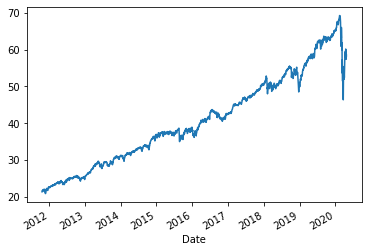

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt #描画ライブラリ
import pandas_datareader.data as web #データのダウンロードライブラリ
tsd = web.DataReader("usmv","yahoo","1980/1/1").dropna()#jpy
tsd.loc[:,'Adj Close'].plot()

In [4]:
tsd.loc[:, 'Adj Close'].head()

Date
2011-10-20    21.327124
2011-10-21    21.587833
2011-10-24    21.587833
2011-10-25    21.512136
2011-10-26    21.604645
Name: Adj Close, dtype: float64

In [5]:
tsd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-10-20,25.360001,25.100000,25.309999,25.360001,4200.0,21.327124
2011-10-21,25.670000,25.670000,25.670000,25.670000,100.0,21.587833
2011-10-24,25.670000,25.670000,25.670000,25.670000,0.0,21.587833
2011-10-25,25.799999,25.580000,25.799999,25.580000,4000.0,21.512136
2011-10-26,25.730000,25.459999,25.730000,25.690001,4200.0,21.604645


In [6]:
import pandas as pd
tsd.to_csv("data.csv")
headerless_tsd = pd.read_csv("data.csv", header=None)
headerless_tsd = headerless_tsd.loc[1:, :]
headerless_tsd.head()


,0,1,2,3,4,5,6
1,2011-10-20,25.360000610351562,25.100000381469727,25.309999465942383,25.360000610351562,4200.0,21.327123641967773
2,2011-10-21,25.670000076293945,25.670000076293945,25.670000076293945,25.670000076293945,100.0,21.587833404541016
3,2011-10-24,25.670000076293945,25.670000076293945,25.670000076293945,25.670000076293945,0.0,21.587833404541016
4,2011-10-25,25.799999237060547,25.579999923706055,25.799999237060547,25.579999923706055,4000.0,21.512136459350586
5,2011-10-26,25.729999542236328,25.459999084472656,25.729999542236328,25.690000534057617,4200.0,21.604644775390625


Starting Portfolio Value: 100000.00
Final Portfolio Value: 100000.00


<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 4 Axes>]]

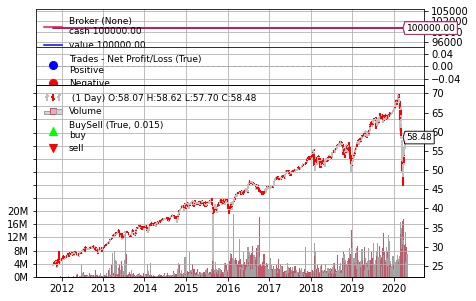

In [7]:
cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=tsd)
cerebro.adddata(data)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())


cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot(style='bar')

In [0]:
# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                # previous close less than the previous close

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.buy()

Starting Portfolio Value: 100000.00
2011-10-20, Close, 25.36
2011-10-21, Close, 25.67
2011-10-24, Close, 25.67
2011-10-25, Close, 25.58
2011-10-26, Close, 25.69
2011-10-27, Close, 26.03
2011-10-28, Close, 26.02
2011-10-31, Close, 25.96
2011-10-31, BUY CREATE, 25.96
2011-11-01, Close, 25.96
2011-11-02, Close, 25.96
2011-11-03, Close, 25.96
2011-11-04, Close, 25.80
2011-11-07, Close, 25.70
2011-11-07, BUY CREATE, 25.70
2011-11-08, Close, 26.10
2011-11-09, Close, 25.61
2011-11-10, Close, 25.74
2011-11-11, Close, 26.20
2011-11-14, Close, 26.03
2011-11-15, Close, 26.03
2011-11-16, Close, 25.84
2011-11-17, Close, 25.39
2011-11-17, BUY CREATE, 25.39
2011-11-18, Close, 25.53
2011-11-21, Close, 25.14
2011-11-22, Close, 25.14
2011-11-23, Close, 24.80
2011-11-25, Close, 24.79
2011-11-25, BUY CREATE, 24.79
2011-11-28, Close, 25.31
2011-11-29, Close, 25.34
2011-11-30, Close, 26.00
2011-12-01, Close, 26.20
2011-12-02, Close, 26.12
2011-12-05, Close, 26.07
2011-12-05, BUY CREATE, 26.07
2011-12-06, Cl

<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 4 Axes>]]

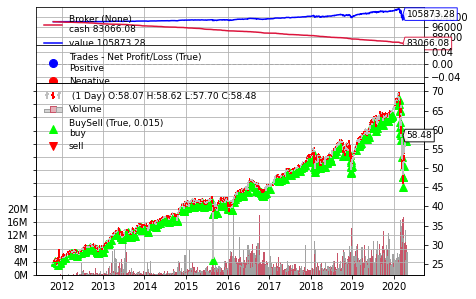

In [9]:
cerebro = bt.Cerebro()

cerebro.addstrategy(TestStrategy)

cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=tsd)
cerebro.adddata(data)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())


cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot(style='bar')